In [1]:
import pandas as pd
import os
df = pd.read_csv("sample.csv")
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


# Description

- `state:` Name of states
- `ditrict:` Name of district in the coressponding state
- `market:` Name of market where they sell there crops
- `commodity:` The crop they grow
- `variety:` The variety of the commodity
- `arrival_date:` Arrival date in the market
- `min_price:` Minimum price of the product
- `max_price:` Maximum price of the product
- `modal_price:` Modal prices are average market prices for a particular commodity over a two-month period

# Checking data-type & number of missing number

In [2]:
display(df.info())
display(df.describe())
display(df.mode())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


None

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Uttar Pradesh,Agra,Pune,Potato,Other,04/03/2019,1000.0,1000.0,1000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500


Now, convert the `arrival_date` into timestamps

In [3]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format="%d/%m/%Y")
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,2019-03-04,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,2019-03-04,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2019-03-04,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,2019-03-04,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,2019-03-04,110000,130000,120000


# Visualization
## 2.1. Univariate analysis

In [4]:
col_name = df.columns.to_list()
text_cols = df.dtypes.index[df.dtypes == 'object'].to_list()
num_cols = df.dtypes.index[(df.dtypes != 'object') & (df.dtypes != 'datetime64[ns]')].to_list()
print(f"textual-cols: {text_cols}")
print(f"numeric-cols: {num_cols}")

textual-cols: ['state', 'district', 'market', 'commodity', 'variety']
numeric-cols: ['min_price', 'max_price', 'modal_price']


### 2.1.1. Count the top categorical

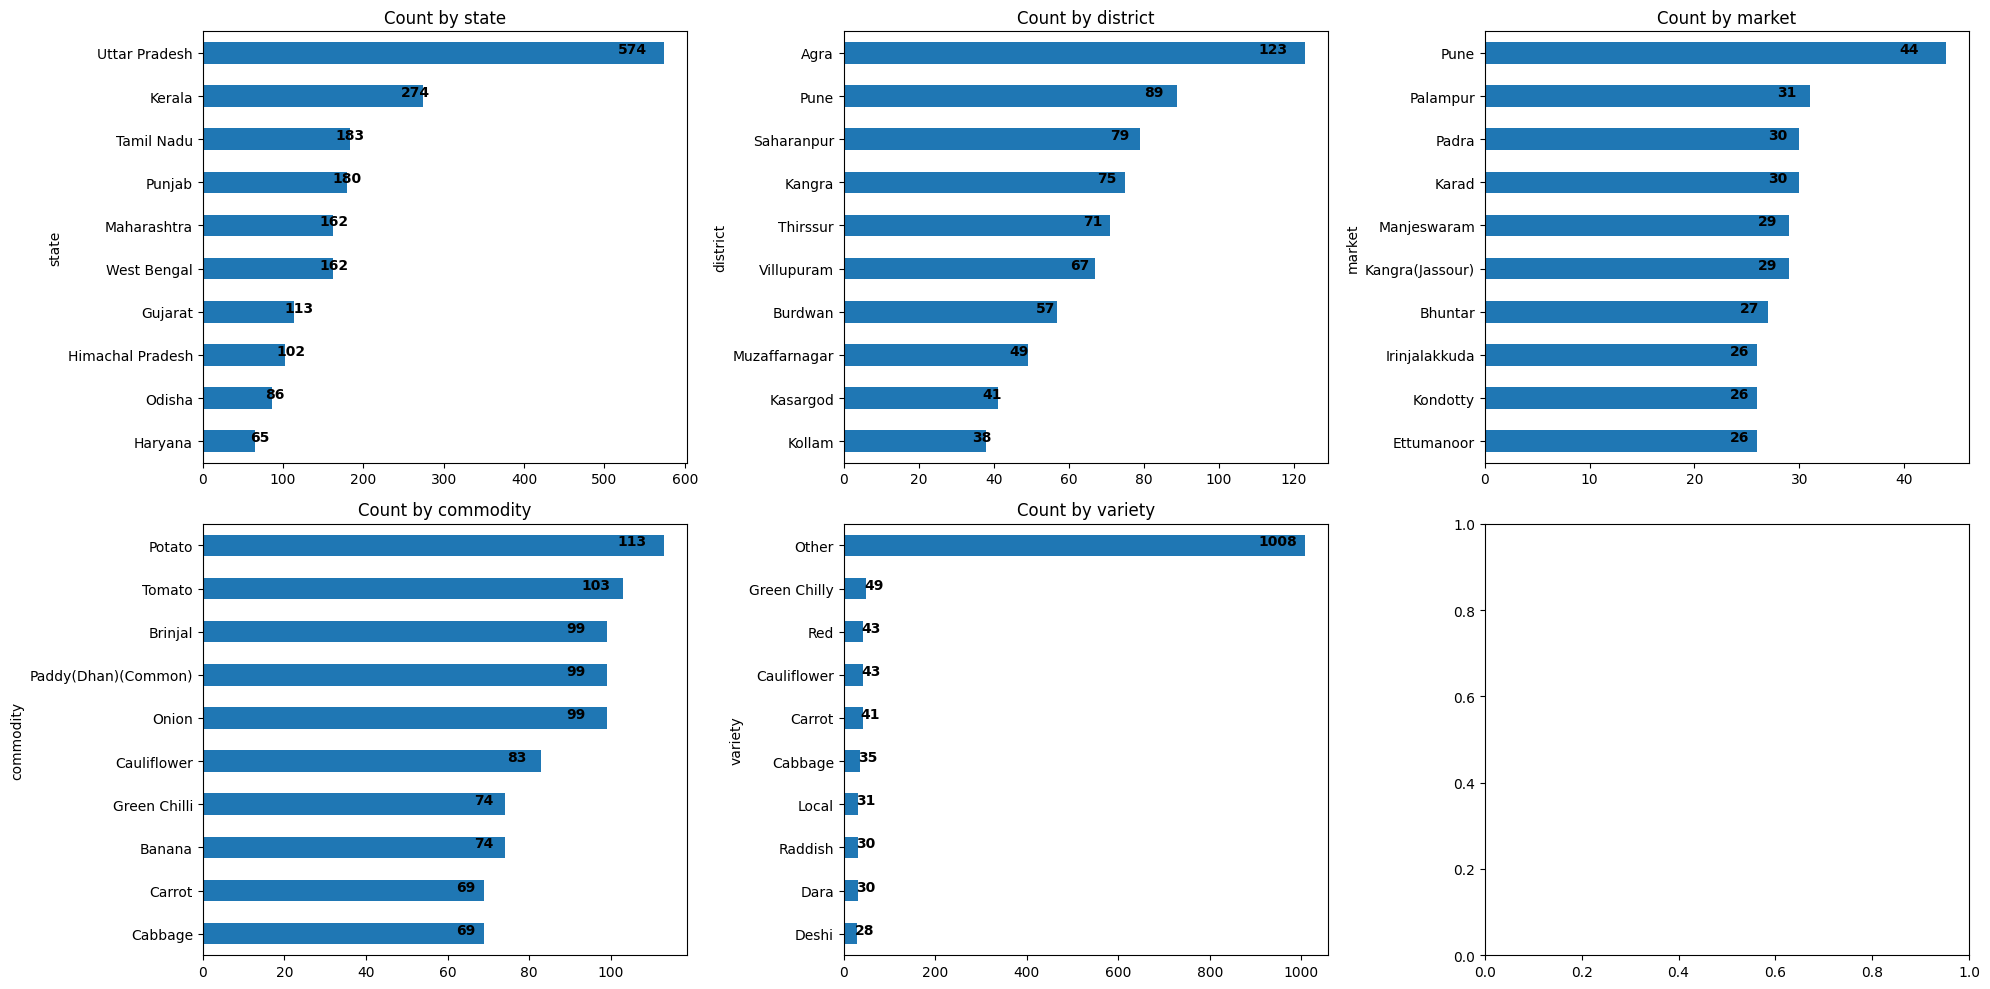

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=len(text_cols) // 2 + 1, figsize=(20, 10))
ax = ax.ravel()
for idx, col in enumerate(text_cols):
    y = df[col].value_counts()
    n_vl = len(df[col].unique())
    y = y.head(10).sort_values()
    x = y.index    
    y.plot(kind='barh', ax = ax[idx])
    ax[idx].set_title(f"Count by {col}")
    for i, v in enumerate(y.values):
        ax[idx].text(v*0.9 , i , str(v), color='black', fontweight='bold')

plt.tight_layout()

### 2.1.2. Explained by pie-plot (percentage)

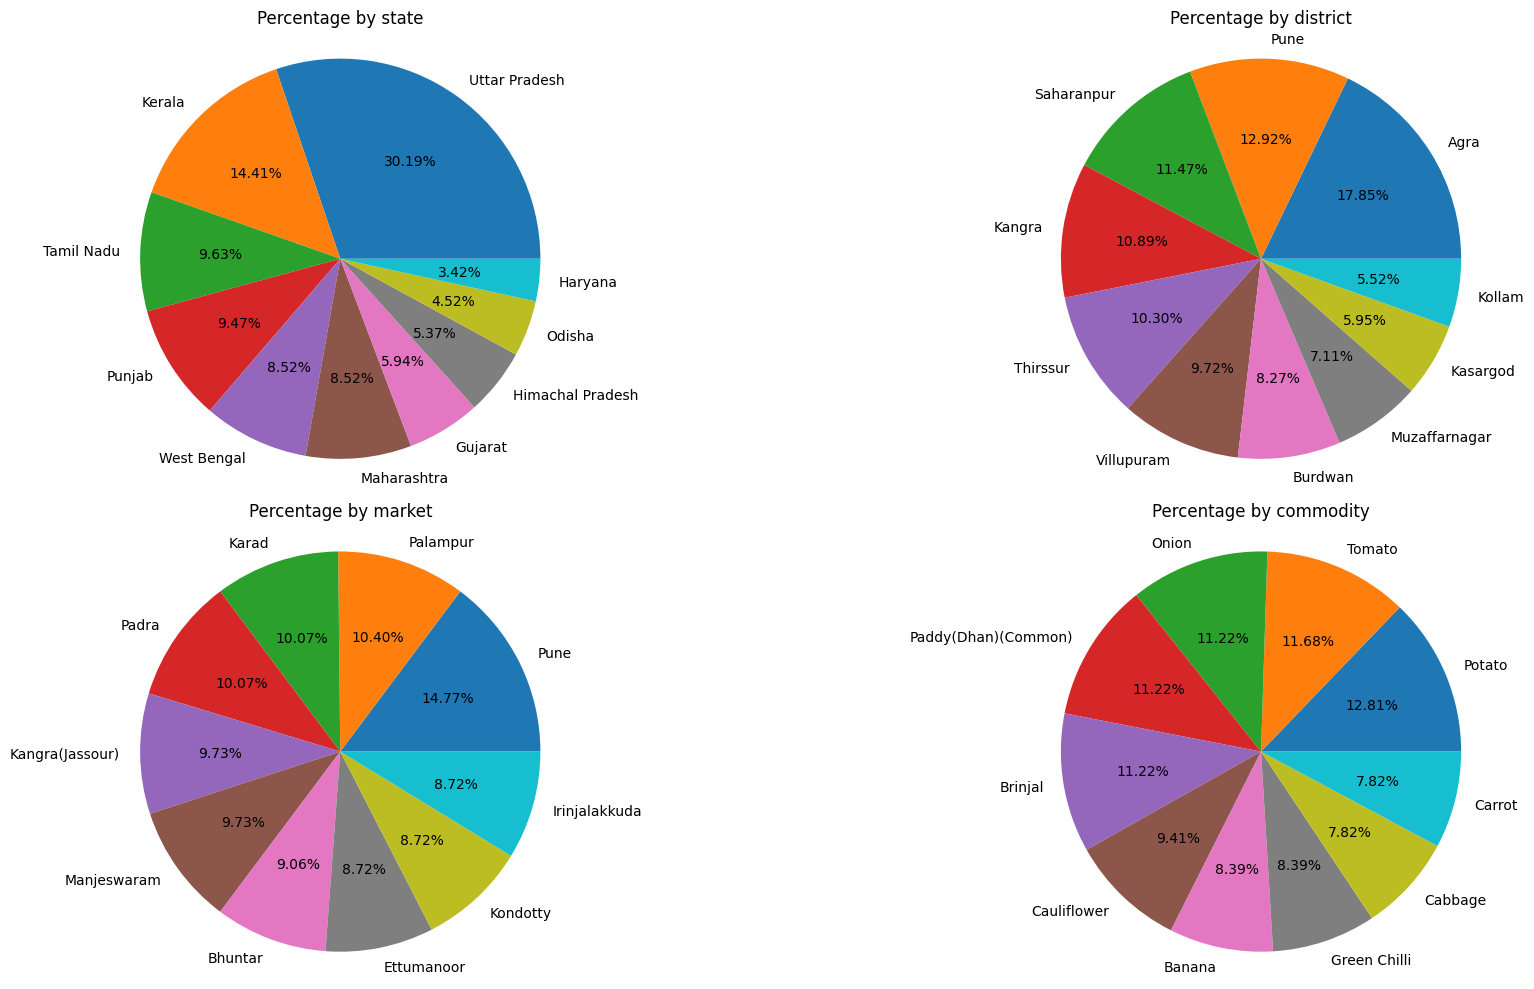

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 10))
ax = ax.ravel()
for idx, col in enumerate(text_cols[:-1]):
    ax[idx].pie(df[col].value_counts().to_list()[:10], 
                labels=df[col].value_counts().index[:10], 
                radius=1.1, autopct="%0.2f%%");
    ax[idx].set_title(f"Percentage by {col}")

plt.tight_layout()

### 2.1.3. Histogram, boxplot of the other numerical features

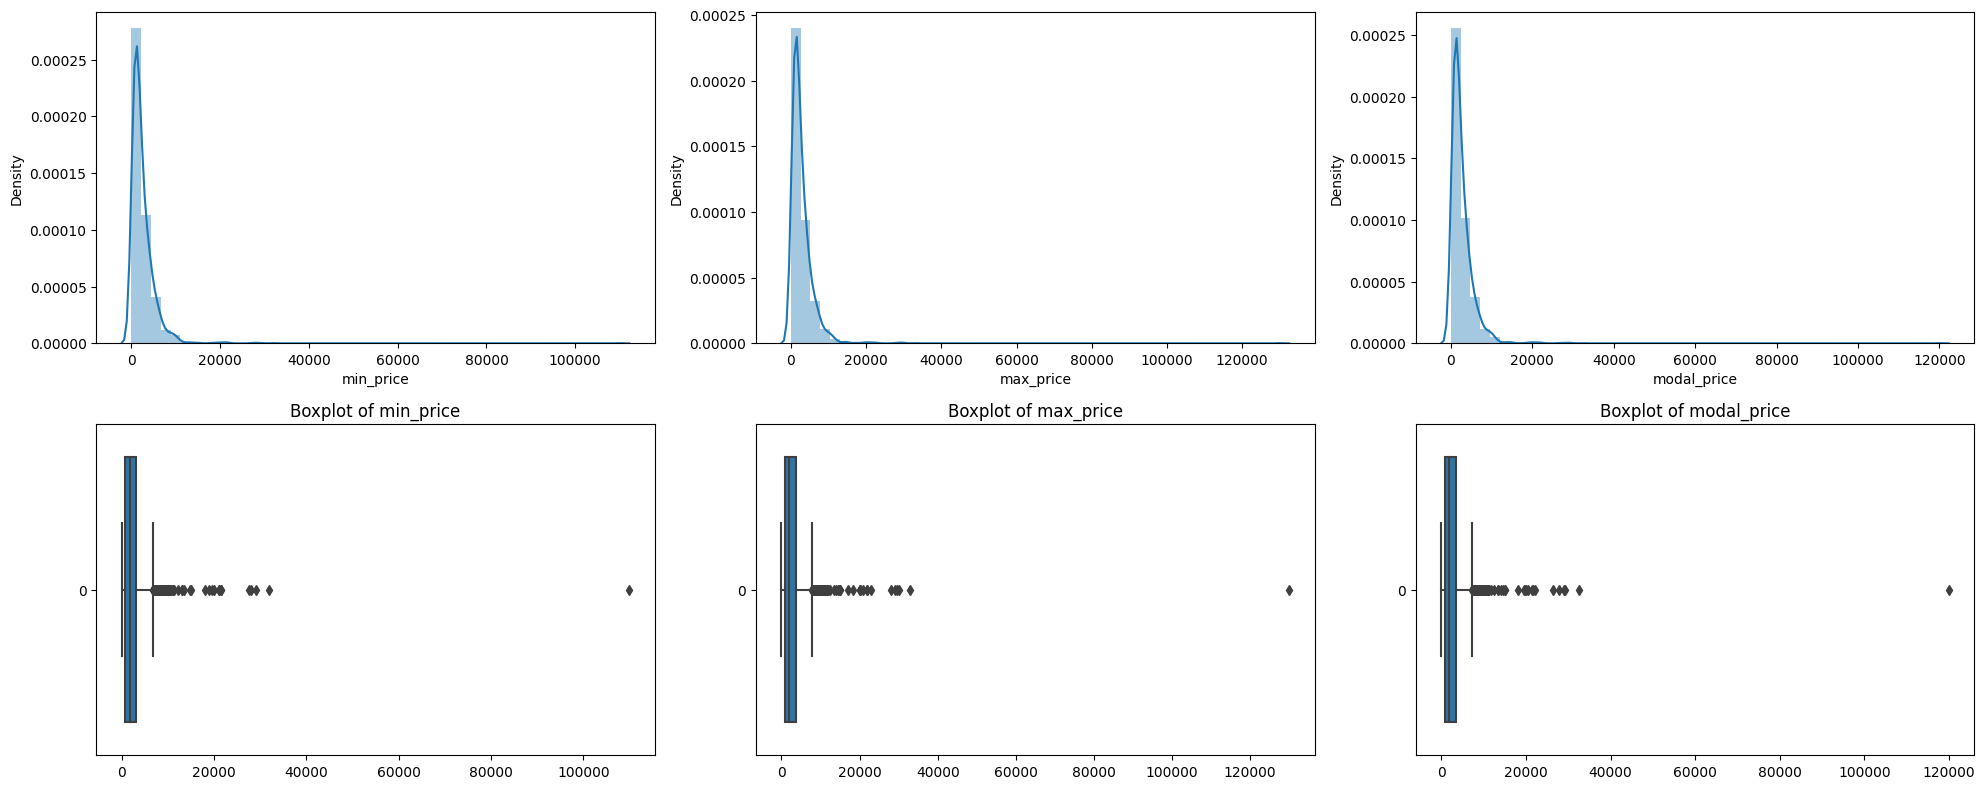

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(nrows=2, ncols=len(num_cols), figsize=(20, 8))
ax = ax.ravel()
for idx, col in enumerate(num_cols):
    sns.boxplot(df[col], orient="h", ax = ax[idx+3])
    sns.distplot(df[col], kde=True, norm_hist=True, ax = ax[idx])
    ax[idx+3].set_title(f"Boxplot of {col}")
plt.tight_layout()

## 2.2. Meta-features analysis

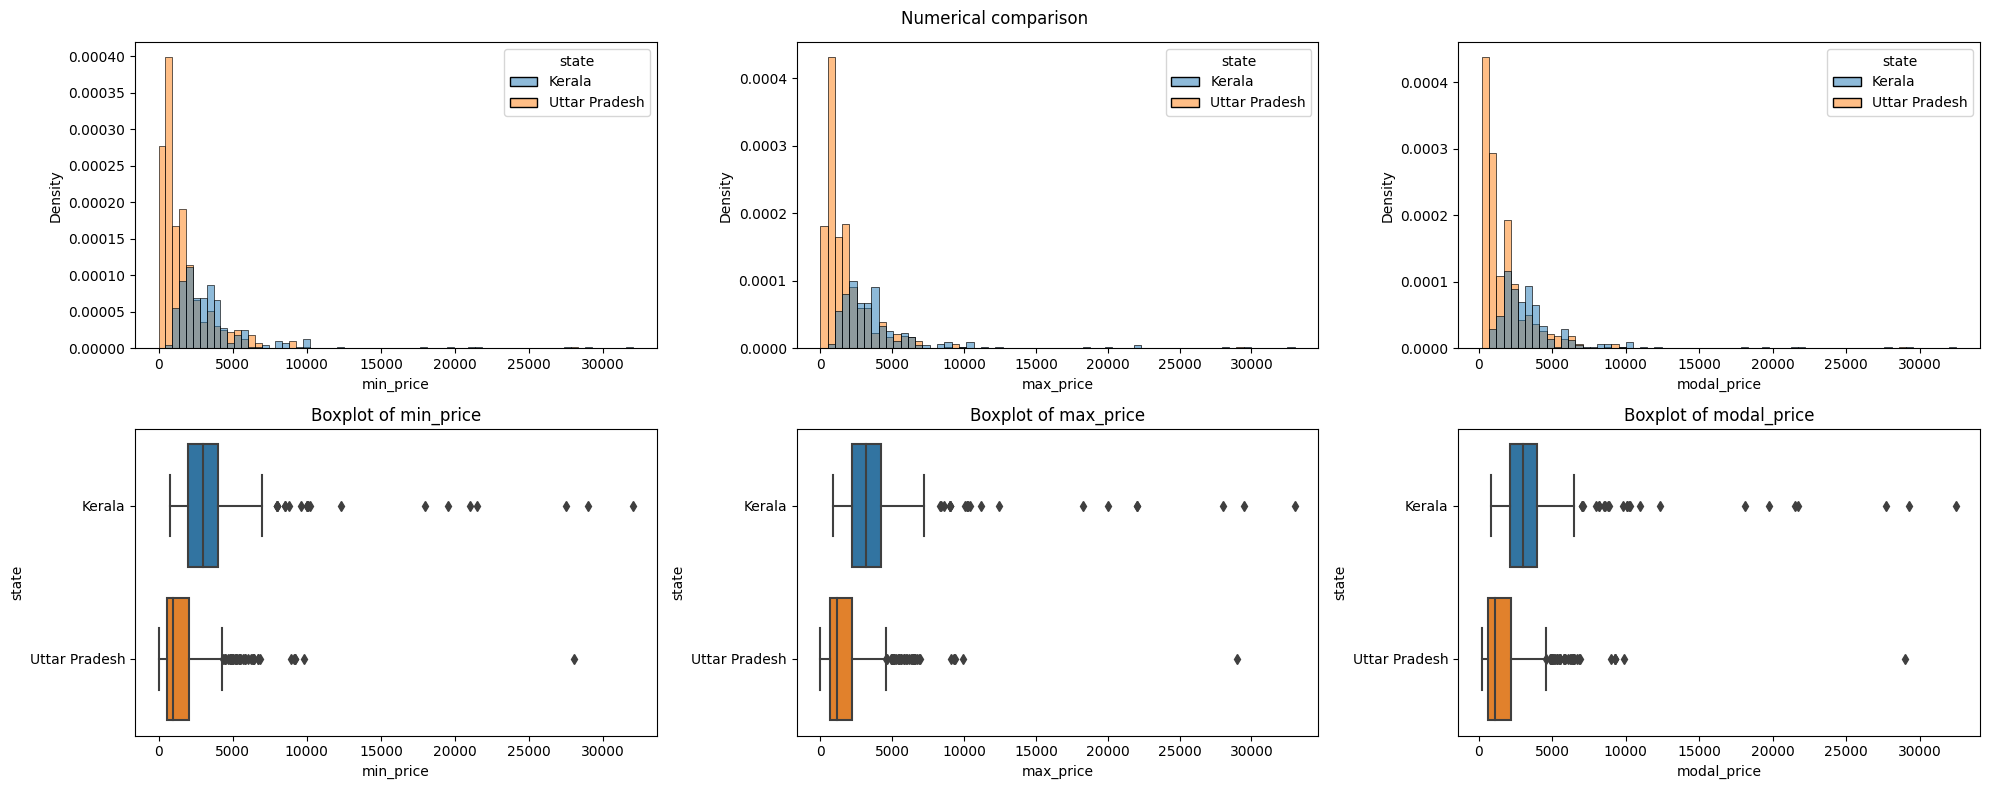

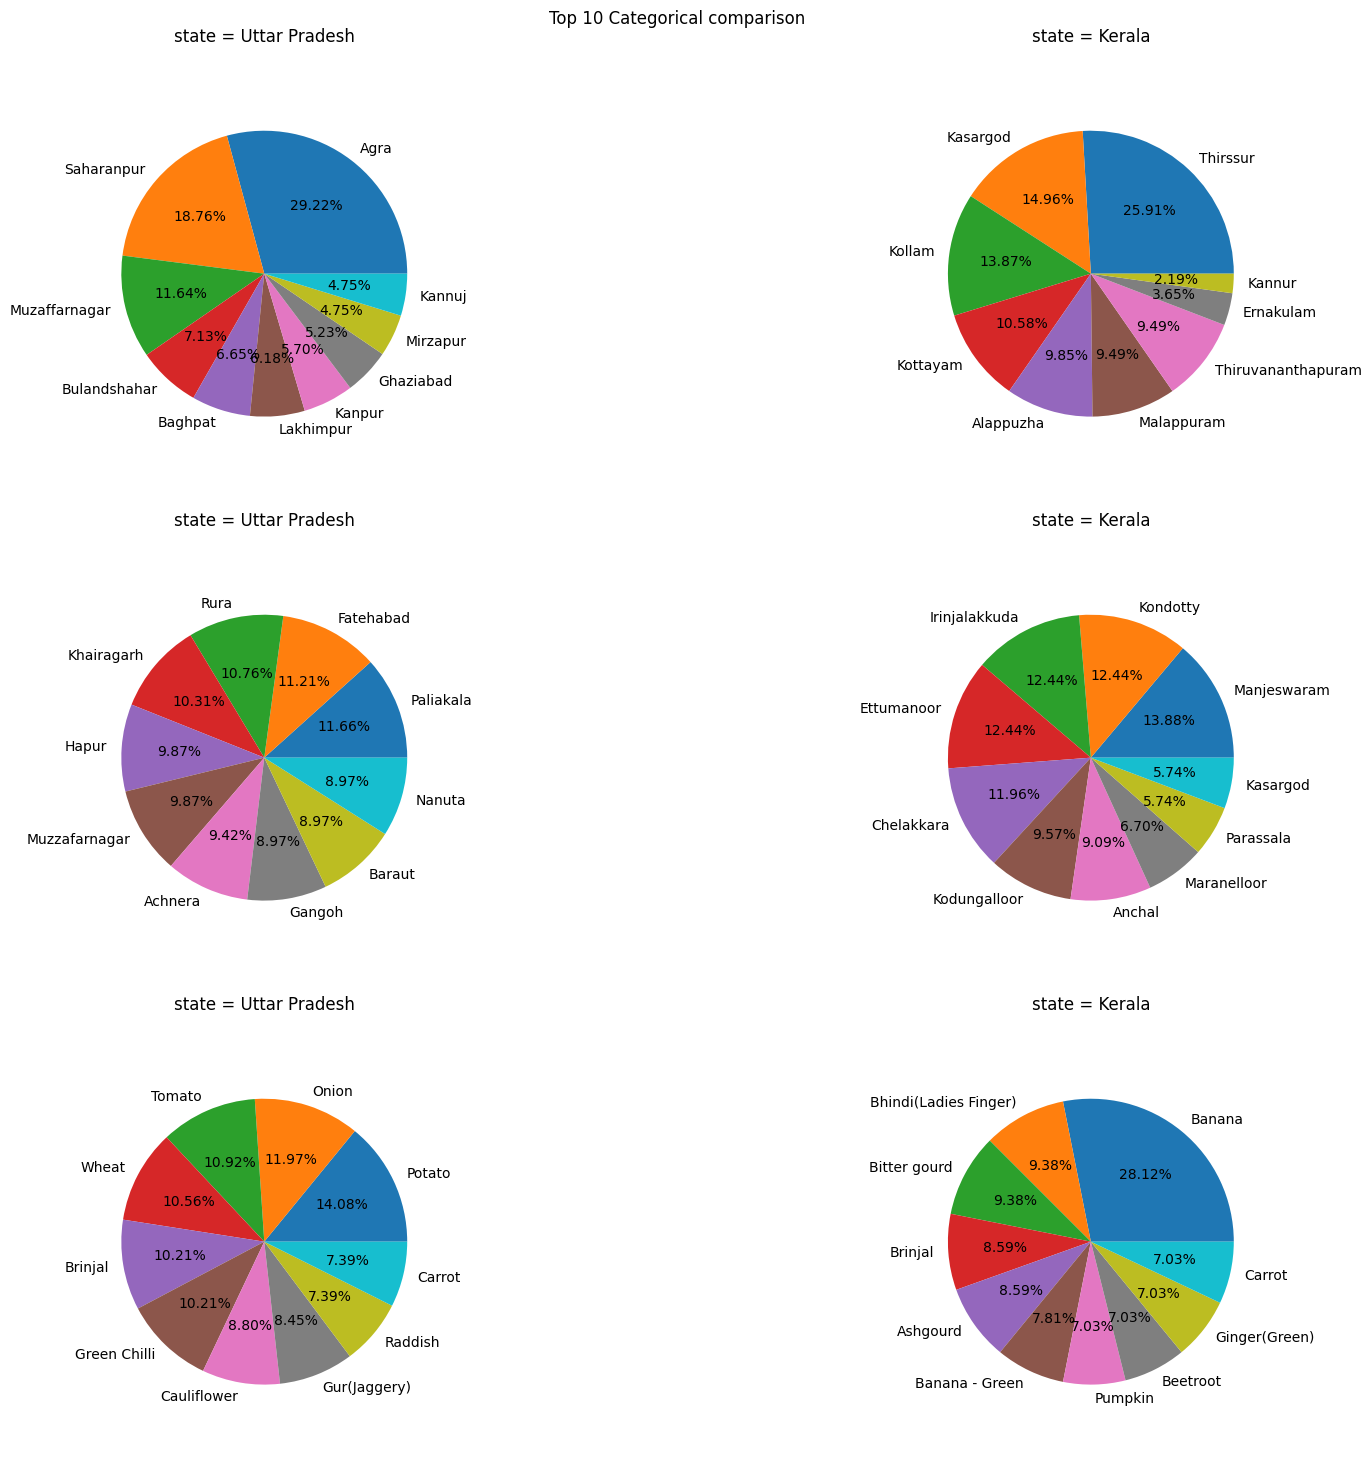

In [11]:
def ext_data_inpair_of_state(data, state1='Uttar Pradesh', state2='Kerala'):
    ext_df = data[data.state.isin([state1, state2])]
    fig, ax = plt.subplots(nrows=2, ncols=len(num_cols), figsize=(20, 8))
    fig.suptitle("Numerical comparison")
    ax = ax.ravel()
    for idx, col in enumerate(num_cols):
        sns.boxplot(ext_df, x=col, y="state", ax = ax[idx+3])
        sns.histplot(ext_df, x=col, hue="state", stat = "density", ax = ax[idx])
        ax[idx+3].set_title(f"Boxplot of {col}")
    plt.tight_layout()

    fig, ax = plt.subplots(nrows=len(text_cols)-2, ncols=2, figsize=(20, 15))
    ax = ax.ravel()
    fig.suptitle("Top 10 Categorical comparison")
    for ids, col in enumerate(text_cols[1:-1]):
        for idx, state in enumerate([state1, state2]):
            fil_df = ext_df[ext_df.state == state]
            ax[ids*2+idx].pie(fil_df[col].value_counts().to_list()[:10], 
                        labels=fil_df[col].value_counts().index[:10], 
                        radius=0.8, autopct="%0.2f%%");
            ax[ids*2+idx].set_title(f"state = {state}")
    plt.tight_layout()

ext_data_inpair_of_state(df)